In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# pip install scikit-learn  --upgrade

In [3]:
df_audio_features_1k = pd.read_csv("df_audio_features_1000.csv",
                                index_col=["name", "artist"])
df_audio_features_1k_cl = df_audio_features_1k.drop(['id','html','type', 'time_signature'], axis=1)
df_audio_features_1k_cl.head()

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
name,artist,,,,,,,,,,,,
All Shook Up,Elvis Presley,0.624,0.468,10,-12.162,1,0.1320,0.881,0.000006,0.144,0.952,74.139,117080
I've Got You Under My Skin - Remastered 1998,Frank Sinatra,0.585,0.247,1,-12.612,1,0.0400,0.452,0.000009,0.107,0.591,127.150,223760
Smoke Gets In Your Eyes,The Platters,0.290,0.227,3,-13.060,1,0.0311,0.944,0.000079,0.617,0.224,114.278,157293
"What'd I Say, Pt. 1 & 2",Ray Charles,0.540,0.681,4,-5.440,1,0.0508,0.808,0.000000,0.162,0.794,88.385,307053
Dream A Little Dream Of Me,Ella Fitzgerald,0.455,0.167,0,-13.613,1,0.0739,0.918,0.000000,0.173,0.404,76.118,185067


How the dataset looks in csv

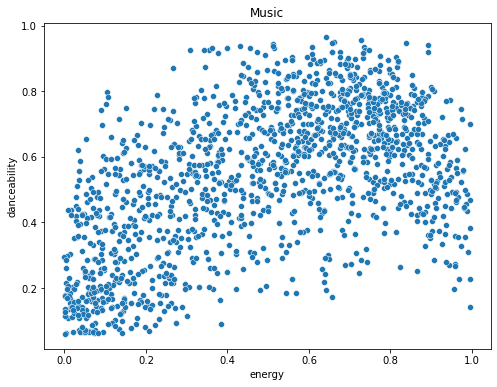

In [4]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(data=df_audio_features_1k_cl, x='energy', y='danceability')
plt.title('Music')
plt.show()

In [5]:
df_audio_features_1k_cl = df_audio_features_1k_cl[['energy','danceability']]

Scaling dataset with MinMax

In [6]:
from sklearn.preprocessing import MinMaxScaler

my_scaler_mm = MinMaxScaler().set_output(transform='pandas')
df_audio_features_1k_scaled = my_scaler_mm.fit_transform(df_audio_features_1k_cl)
df_audio_features_1k_scaled[:5]

,,energy,danceability
name,artist,,
All Shook Up,Elvis Presley,0.469869,0.624060
I've Got You Under My Skin - Remastered 1998,Frank Sinatra,0.247977,0.580938
Smoke Gets In Your Eyes,The Platters,0.227896,0.254755
"What'd I Say, Pt. 1 & 2",Ray Charles,0.683728,0.531181
Dream A Little Dream Of Me,Ella Fitzgerald,0.167654,0.437196


Kmeans and clusters

In [7]:
from sklearn.cluster import KMeans

kmeans_df_audio_features_1k = KMeans(n_clusters=4)
kmeans_df_audio_features_1k.fit(df_audio_features_1k_scaled)

Z:\Progs\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
Z:\Progs\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


KMeans(n_clusters=4)

All cluster centers

In [8]:
kmeans_df_audio_features_1k.cluster_centers_

array([[0.6732731 , 0.77607734],
       [0.32776379, 0.54164449],
       [0.13546632, 0.19249181],
       [0.80372817, 0.47818329]])

In [9]:
kmeans_df_audio_features_1k

KMeans(n_clusters=4)

In [10]:
cl_pos = pd.DataFrame(kmeans_df_audio_features_1k.cluster_centers_)
cl_pos.columns = ['energy', 'danceability']
cl_pos

,energy,danceability
0,0.673273,0.776077
1,0.327764,0.541644
2,0.135466,0.192492
3,0.803728,0.478183


Comparing centroids to dataset

ValueError: Could not interpret value `energy` for parameter `x`

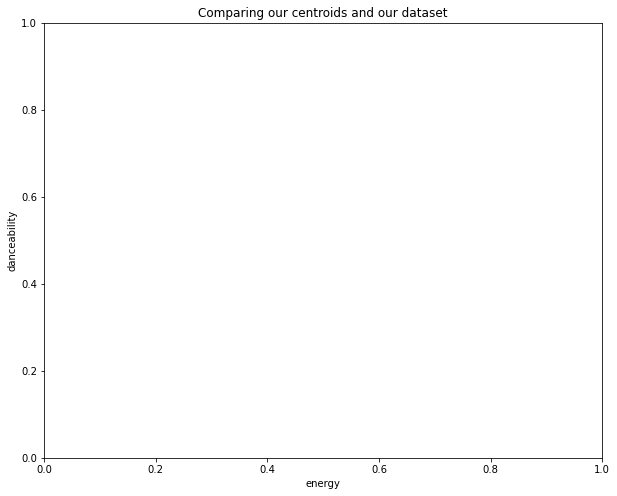

In [13]:
fig, ax = plt.subplots(figsize=(10, 8))
plot_data = pd.DataFrame(peng_cl_scaled)
plot_data.columns = ['bill_length_mm','bill_depth_mm']

plt.title('Comparing our centroids and our dataset')
plt.xlabel('bill lenght mm normalised')
plt.ylabel('bill depth mm normalised')
sns.scatterplot(data=plot_data, x='bill_length_mm', y='bill_depth_mm')
sns.scatterplot(data=cl_pos, x='bill_length_mm', y='bill_depth_mm', color='red', s=250)
plt.show()

ValueError: Could not interpret value `danceability` for parameter `x`

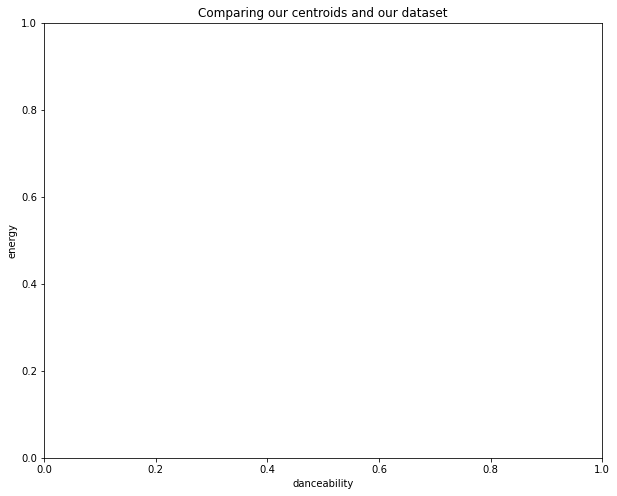